In [1]:
import numpy as np

In [2]:
np.random.seed(0)

In [3]:
# Стандартная обработка масссива
def compute_reciprocals(values):    
    output = np.empty(len(values))    
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output

values = np.random.randint(1, 10, size=10)
compute_reciprocals(values)

array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ,
       0.25      , 0.16666667, 0.33333333, 0.2       , 0.125     ])

In [4]:
# Работают медленно (т.к. при каждой операции деления CPython проверяет тип объекта
# и выполняет динамический поиск подходящей функции. В отличии от компилируемых языков,
# где тип известен заранее.)
big_values = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(big_values)

3.64 s ± 50.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Векторизованные операции(Универсальные функции)(Py_WP p.79)

In [5]:
print(compute_reciprocals(values))
print(1.0 / values)  # Векторизованная операция (удобный интерфейс для компилируемой процедуры со статической типизацией)

[0.16666667 1.         0.25       0.25       0.125      0.25
 0.16666667 0.33333333 0.2        0.125     ]
[0.16666667 1.         0.25       0.25       0.125      0.25
 0.16666667 0.33333333 0.2        0.125     ]


In [6]:
%timeit (1.0 / big_values)

10.2 ms ± 121 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
np.arange(5) / np.arange(1, 6) # С помощью универсальных функций(ufunc) можно выполнять операции над двумя массивами

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

In [8]:
x = np.arange(9).reshape(3, 3)
2 ** x  # И над многомерными массивами

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]], dtype=int32)

### Арифмитические функции над массивами(Py_WP p.80)

In [9]:
x = np.arange(5)
print('x                              =', x)
print('x + 10 = np.add(x, 10)         =', x + 10)
print('x - 10 = np.subtract(x, 10)    =', x - 10)
print('x * 5  = np.multiply(x, 5)     =', x * 5)
print('x / 2  = np.divide(x, 2)       =', x / 2)
print('x // 2 = np.floor_divide(x, 2) =', x // 2, 'Деление с округлением в меньшую сторону')
print('-x     = np.negative(x)        =', -x)
print('x ** 2 = np.power(x, 2)        =', x ** 2)
print('x % 2  = np.mod(x, 2)          =', x % 2, 'Остаток от деления')

x                              = [0 1 2 3 4]
x + 10 = np.add(x, 10)         = [10 11 12 13 14]
x - 10 = np.subtract(x, 10)    = [-10  -9  -8  -7  -6]
x * 5  = np.multiply(x, 5)     = [ 0  5 10 15 20]
x / 2  = np.divide(x, 2)       = [0.  0.5 1.  1.5 2. ]
x // 2 = np.floor_divide(x, 2) = [0 0 1 1 2] Деление с округлением в меньшую сторону
-x     = np.negative(x)        = [ 0 -1 -2 -3 -4]
x ** 2 = np.power(x, 2)        = [ 0  1  4  9 16]
x % 2  = np.mod(x, 2)          = [0 1 0 1 0] Остаток от деления


In [10]:
-(2 ** x) + 10 # Можно комбинировать эти функции

array([ 9,  8,  6,  2, -6], dtype=int32)

In [11]:
x = np.array([-1, -2, -3, 0, 3, 2, 1]) 
print(x)
print(abs(x))
print(np.abs(x))
print(np.absolute(x))

[-1 -2 -3  0  3  2  1]
[1 2 3 0 3 2 1]
[1 2 3 0 3 2 1]
[1 2 3 0 3 2 1]


### Тригонометрические функции(Py_WP p.82)

In [12]:
theta = np.linspace(0, np.pi, 3)
print('theta      =', theta)
print('sin(theta) =', np.sin(theta))
print('cos(theta) =', np.cos(theta))
print('tan(theta) =', np.tan(theta))
print('ctan(theta)=', np.cos(theta) / np.sin(theta), np.tan(theta) ** -1)

theta      = [0.         1.57079633 3.14159265]
sin(theta) = [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) = [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) = [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]
ctan(theta)= [            inf  6.12323400e-17 -8.16561968e+15] [            inf  6.12323400e-17 -8.16561968e+15]


C:\Users\Juninho\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\Juninho\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in reciprocal
  


In [13]:
x = np.array([-1, 0, 1])
print('x         =', x)
print('arcsin(x) =', np.arcsin(x))
print('arccos(x) =', np.arccos(x))
print('arctan(x) =', np.arctan(x))

x         = [-1  0  1]
arcsin(x) = [-1.57079633  0.          1.57079633]
arccos(x) = [3.14159265 1.57079633 0.        ]
arctan(x) = [-0.78539816  0.          0.78539816]


### Показательные функции(Py_WP p.82)

In [14]:
x = [1, 2, 3]
print('x     =', x)
print('e^x   =', np.exp(x))
print('2^x   =', np.exp2(x))
print('3^x   =', np.power(3, x))

x     = [1, 2, 3]
e^x   = [ 2.71828183  7.3890561  20.08553692]
2^x   = [2. 4. 8.]
3^x   = [ 3  9 27]


In [15]:
x = [1, 2, 4, 10]
print('x       =', x)
print('ln(x)   =', np.log(x))
print('log2(x) =', np.log2(x))
print('log10(x)=', np.log10(x))
print('exp(x) - 1 =', np.expm1(x))    # При очень малых значениях Х эти две функции возвращают более точные значения чем обычные
print('log(1 + x) =', np.log1p(x))

x       = [1, 2, 4, 10]
ln(x)   = [0.         0.69314718 1.38629436 2.30258509]
log2(x) = [0.         1.         2.         3.32192809]
log10(x)= [0.         0.30103    0.60205999 1.        ]
exp(x) - 1 = [1.71828183e+00 6.38905610e+00 5.35981500e+01 2.20254658e+04]
log(1 + x) = [0.69314718 1.09861229 1.60943791 2.39789527]


### Указание массива для вывода результата универсальной функции(Py_WP p.84)

In [16]:
x = np.arange(1, 5)
y = np.empty(4)
np.power(x, 2, out=y)
print(y)

[ 1.  4.  9. 16.]


In [17]:
y_1 = np.zeros(8)
np.multiply(x, 10, out=y_1[:4])  # Использование этой функции с представлением 
print(y_1)

[10. 20. 30. 40.  0.  0.  0.  0.]


In [18]:
y_2 = np.zeros(8)
np.multiply(x, 10, out=y_2[::2])
print(y_2)

[10.  0. 20.  0. 30.  0. 40.  0.]


### Сводные показатели (Py_WP p.85)

In [19]:
# Метод reduce универсальной функции последовательно применяет данную функцию массива
# к реузультату пердыдущей операции и новому элементу

x = np.arange(1, 6)
print(x)
# Например reduce от add выдает сумму всех элементов массива
print(np.add.reduce(x))

[1 2 3 4 5]
15


In [20]:
np.multiply.reduce(x) # перемножение всех элементов массива

120

In [21]:
# Фунцкция accumulate сохраняет все промежуточные результаты вычислений
np.add.accumulate(x)
# существуют также отдельные функции суммы, умножения и т.д.(np.sum, np.prod)

array([ 1,  3,  6, 10, 15], dtype=int32)

In [22]:
# Все универсальные функции могут выводить результат приминения соответствующей функции ко всем парам двух аргументов
# с помощью метода outer

x = np.arange(1, 6)
np.multiply.outer(x, x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

# Агрегирование

In [23]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)     # Обычная функция суммирования Python работает намного медленнее
%timeit np.sum(big_array)  # Функция из модуля Numpy

268 ms ± 13.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.79 ms ± 156 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [24]:
# Также как минимум и максимум
print('min')
%timeit min(big_array)
%timeit np.min(big_array)
print('max')
%timeit max(big_array)
%timeit np.max(big_array)

min
206 ms ± 20.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.09 ms ± 25.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
max
215 ms ± 16.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.07 ms ± 31.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [25]:
# Сокращенная запись функций в модуле Numpy
print('min', big_array.min())
print('max', big_array.max())
print('sum', big_array.sum())

min 7.071203171893359e-07
max 0.9999997207656334
sum 500222.83501534775


### Многомерные сводные показатели(Py_WP p.88)

In [26]:
M = np.random.random((3, 4))
M

array([[0.37038403, 0.06785738, 0.48412739, 0.7476983 ],
       [0.47720923, 0.23956676, 0.87236336, 0.36038331],
       [0.35509894, 0.63857126, 0.71866774, 0.76571011]])

In [27]:
M.sum()

6.0976378074264606

In [28]:
# С помощью дополнительного аргумента axis можно указать ось по которой вычисляется сводный показатель
# axis задает ось по которой измерение будет схлопнуто
print(M.min(), 'минимальное значение в массиве')
print(M.min(axis=0), 'минимальные значения по столбцам')
print(M.max(axis=1), 'максимальные значения по строкам')

0.06785737543709247 минимальное значение в массиве
[0.35509894 0.06785738 0.48412739 0.36038331] минимальные значения по столбцам
[0.7476983  0.87236336 0.76571011] максимальные значения по строкам


### Список доступных функций агрегирования(Py_WP p.89)

In [29]:
print('Имя функции      ', 'Nan-безопасн. версия', '/Описание')
print('np.sum()       --', 'np.nansum()       --', 'Вычисляет сумму элементов')
print('np.prod()      --', 'np.nanprod()      --', 'Вычисляет произведение элементов')
print('np.mean()      --', 'np.nanmean()      --', 'Вычисляет среднее значение элементов')
print('np.std()       --', 'np.nanstd()       --', 'Вычисляет стандартное отклонение')
print('np.var()       --', 'np.nanvar()       --', 'Вычисляет дисперсию')
print('np.min()       --', 'np.nanmin()       --', 'Вычисляет минимальное значение')
print('np.max()       --', 'np.nanmax()       --', 'Вычисляет максимальное значение')
print('np.argmin()    --', 'np.nanargmin()    --', 'Вычисляет индекс минимального значения')
print('np.argmax()    --', 'np.nanargmax()    --', 'Вычисляет индекс максимального значения')
print('np.median()    --', 'np.nanmedian()    --', 'Вычисляет медиану элементов')
print('np.percentile()--', 'np.nanpercentile()--', 'Вычисляет квантили элементов')
print('np.any()       --', 'N/A               --', 'Проверяет существуют ли элементы со значением true')
print('np.all()       --', 'N/A               --', 'Проверяет все ли элементы имеют значение true')

Имя функции       Nan-безопасн. версия /Описание
np.sum()       -- np.nansum()       -- Вычисляет сумму элементов
np.prod()      -- np.nanprod()      -- Вычисляет произведение элементов
np.mean()      -- np.nanmean()      -- Вычисляет среднее значение элементов
np.std()       -- np.nanstd()       -- Вычисляет стандартное отклонение
np.var()       -- np.nanvar()       -- Вычисляет дисперсию
np.min()       -- np.nanmin()       -- Вычисляет минимальное значение
np.max()       -- np.nanmax()       -- Вычисляет максимальное значение
np.argmin()    -- np.nanargmin()    -- Вычисляет индекс минимального значения
np.argmax()    -- np.nanargmax()    -- Вычисляет индекс максимального значения
np.median()    -- np.nanmedian()    -- Вычисляет медиану элементов
np.percentile()-- np.nanpercentile()-- Вычисляет квантили элементов
np.any()       -- N/A               -- Проверяет существуют ли элементы со значением true
np.all()       -- N/A               -- Проверяет все ли элементы имеют значение true

# Транслирование (Py_WP, p.92)

In [30]:
# При операциях над массивами разных размеров используется транслирование
a = np.array([1, 2, 3])
b = np.array([5])

print(a + b)   # Массив b растягивается до размеров второго массива [5, 5, 5]
print(5 + a)   # Также происходит и со скалярными значениясм

[6 7 8]
[6 7 8]


In [31]:
# Аналогично можно работать с массивами большей размерности
M = np.ones((3, 3))
print('a', a, sep='\n')
print('M', M, sep='\n')

print('M + a', M + a, sep='\n')     # Одномерный массив транслируется растягиваясь до двумерного

a
[1 2 3]
M
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
M + a
[[2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]]


In [32]:
# Также могут транслироваться оба массива
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

print('a', a)
print('b', b)

print('a + b', a + b, sep='\n')

a [0 1 2]
b [[0]
 [1]
 [2]]
a + b
[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [33]:
# Три правила транслирования
# 1) сначала добавляются единицы слева для недостающего измерения 
# 2) Затем там где не сопадает размерность массив с 1 в данном измерении растягивается до второго
# 3) Если массивы не совпадают в каком-то измерении и ни в одном нет 1, то генерируется ошибка

# Но
M = np.ones((3, 2))
a = np.arange(3)
print(M, a)
# 
M + a

[[1. 1.]
 [1. 1.]
 [1. 1.]] [0 1 2]


ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [34]:
# Для такого сложения нужно добавить измерние в ручную
print(M + a[:, np.newaxis])
# Или
print(M.reshape((3, 2, 1)) + a)

[[1. 1.]
 [2. 2.]
 [3. 3.]]
[[[1. 2. 3.]
  [1. 2. 3.]]

 [[1. 2. 3.]
  [1. 2. 3.]]

 [[1. 2. 3.]
  [1. 2. 3.]]]


# Сравнения, маски и булева логика

In [35]:
x = np.arange(1, 6)
print(x)
print(x < 3 , 'Меньше', ', np.less')

print(x > 3, 'Больше', ', np.greater')
print(x == 3, 'Равно', ', np.equal')
print(x <= 3, 'Меньше или равно', ', np.less_equal')
print(x != 3, 'Не равно', ', np.not_equal')

[1 2 3 4 5]
[ True  True False False False] Меньше , np.less
[False False False  True  True] Больше , np.greater
[False False  True False False] Равно , np.equal
[ True  True  True False False] Меньше или равно , np.less_equal
[ True  True False  True  True] Не равно , np.not_equal


In [36]:
# Можно сравнивать два массива
x == (x ** 2)

array([ True, False, False, False, False])

In [37]:
# Работает и с многомерными массивами
x = np.random.randint(10, size=(4, 3))
print(x)
print(x > 4)

[[5 1 0]
 [0 2 4]
 [8 6 8]
 [1 1 7]]
[[ True False False]
 [False False False]
 [ True  True  True]
 [False False  True]]


## Агрегативные показатели с булевыми массивами

In [38]:
np.sum(x > 4)

5

In [39]:
print(np.sum(x > 4, axis=0)) # Сколько значений x < 4 в каждом столбце
print(np.sum(x > 4, axis=1)) # Сколько значений x < 4 в каждой строке

[2 1 2]
[1 0 3 1]


In [40]:
np.any(x > 4) # Хотя бы один из элементов попадает

True

In [41]:
np.all(x < 7, axis=1) # Все элементы правдивы по строкам

array([ True,  True, False, False])

## Булевы операторы

In [42]:
np.sum((x < 7) & (x > 3))   # Оператор И  --- np.bitwise_and

3

In [43]:
np.sum((x >= 7) | (x <= 3))   # ИЛИ   --- np.bitwise_or

9

In [44]:
np.sum(((x % 2) == 0) ^ ((x % 3) == 0))  # Исключающее ИЛИ (XOR)   --- np.bitwise_xor

4

In [45]:
np.sum(~(x < 2))    # НЕ

7

    Операторы (&. |, ^, ~) - побитовые, поэтому применяются к каждому элементу массива. 
    В отличии от (AND, OR, XOR, NOT), которые не могут применяться к массивам как универсальные функции.

## Булевы массивы как маски

In [46]:
print(x)
print(x[x < 3])  # Возвращает одномерный массив 

[[5 1 0]
 [0 2 4]
 [8 6 8]
 [1 1 7]]
[1 0 0 2 1 1]


# Прихотливая индексация

In [47]:
y = np.random.randint(100, size=(10))
print(y)

[68 53 76 30  8 83 61 11 55 82]


In [48]:
[y[3], y[5]]

[30, 83]

In [49]:
ind = [3, 5]
y[ind]

array([30, 83])

In [50]:
# на выходе принимает форму массива индексов
ind = np.array([[1, 2],
                [3, 4],
                [5, 6]])
y[ind]

array([[53, 76],
       [30,  8],
       [83, 61]])

In [51]:
# Работает и с многомерными массивами
print(x)
ind = [[1, 3], [2, 1]]
x[ind]

[[5 1 0]
 [0 2 4]
 [8 6 8]
 [1 1 7]]


array([4, 1])

In [52]:
Y = np.arange(1, 13).reshape((3, 4))
row = np.array([1, 2, 0])
col = np.array([3, 1, 2])
print(Y)
Y[row, col]

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


array([ 8, 10,  3])

In [53]:
# при индексации при помощи массивов разных размерностей, 
# составление пар индексов происходит с помощью транслирования
print(row[:, np.newaxis])
print(col)
Y[row[:, np.newaxis], col]

[[1]
 [2]
 [0]]
[3 1 2]


array([[ 8,  6,  7],
       [12, 10, 11],
       [ 4,  2,  3]])

In [54]:
# Можно применять "прихотливые" индексы 
# с обычными
print(Y[2, [2, 1, 3]])

# со срезами
print(Y[1:, [2, 1, 3]])

# А также прихотливую индексацию и маскирование
mask = np.array([1, 0, True, False], dtype=bool)
Y[row[:, np.newaxis], mask]

[11 10 12]
[[ 7  6  8]
 [11 10 12]]


array([[ 5,  7],
       [ 9, 11],
       [ 1,  3]])

## Пример: Выборка случайных точек

In [55]:
# Например есть двумерный массив
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = np.random.multivariate_normal(mean, cov, 100)
np.shape(X)

(100, 2)

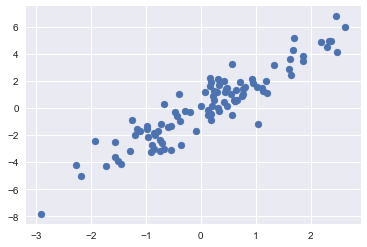

In [56]:
# Нарисуем график
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # для задания стиля графика

plt.scatter(X[:, 0], X[:, 1]);

In [57]:
# С помощью прихотливой индексации выберем 10 случайных значений
indices = np.random.choice(np.shape(X)[0], 10, replace=False) # replace=False для выбора не повторяющихся значений
indices

array([26, 76, 27, 23,  8,  5,  1, 24, 78, 94])

In [58]:
selection = X[indices]  # "прихотливая" индексация
np.shape(selection)

(10, 2)

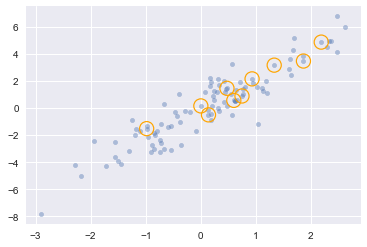

In [59]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.4, s=20)
plt.scatter(selection[:, 0], selection[:, 1],
            c='none',
            edgecolors= 'orange',
            linewidth=1.2,
            s=200);

## Изменение значений с помощью прихотливой индексации

In [60]:
x = np.arange(10)
i = np.array([1, 5, 6, 9])
print(x)
x[i] = 99
print(x)

[0 1 2 3 4 5 6 7 8 9]
[ 0 99  2  3  4 99 99  7  8 99]


In [61]:
# Можно использовать любой из операторов присваивания
x[i] += 100
print(x)

[  0 199   2   3   4 199 199   7   8 199]


In [62]:
# но
x[[0, 0]] = [4, 6]
print(x) # Сначала присваивается 4 затем 6

[  6 199   2   3   4 199 199   7   8 199]


In [63]:
# Но
x = np.zeros(10)
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
print(x)  # не 1, 2, 3 как ожидалось. Неочивидное поведение

[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]


In [64]:
# Чтобы работало как хотели нужно использовать at()
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


## Гистограмма вручную с помощью at()

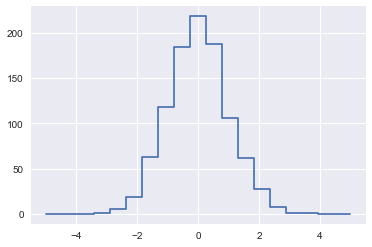

In [65]:
np.random.seed(42)
x = np.random.randn(1000)

bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# ищем для каждого x подходящий интервал
i = np.searchsorted(bins, x)

# добавляем 1 каждому x в интервале
np.add.at(counts, i, 1)

plt.plot(bins, counts,
         linestyle='steps');

(array([  0.,   0.,   0.,   1.,   5.,  19.,  63., 118., 184., 218., 187.,
        106.,  62.,  27.,   8.,   1.,   1.,   0.,   0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 <a list of 1 Patch objects>)

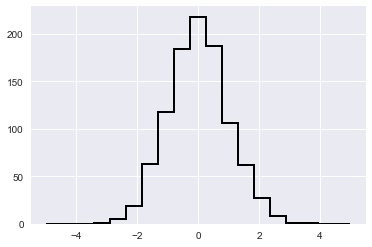

In [66]:
# то же самое
plt.hist(x, bins, histtype='step', color='black', linewidth=2)

In [67]:
# Эта функция делает практически то же самое с помощью функции np.histogram()

print(np.histogram(x, bins))

print(counts, bins)

(array([  0,   0,   0,   1,   5,  19,  63, 118, 184, 218, 187, 106,  62,
        27,   8,   1,   1,   0,   0], dtype=int64), array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
       -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
        0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
        2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]))
[  0.   0.   0.   0.   1.   5.  19.  63. 118. 184. 218. 187. 106.  62.
  27.   8.   1.   1.   0.   0.] [-5.         -4.47368421 -3.94736842 -3.42105263 -2.89473684 -2.36842105
 -1.84210526 -1.31578947 -0.78947368 -0.26315789  0.26315789  0.78947368
  1.31578947  1.84210526  2.36842105  2.89473684  3.42105263  3.94736842
  4.47368421  5.        ]


In [68]:
# на маленьких массивах
%timeit np.histogram(x, bins)
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

182 µs ± 12.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
249 µs ± 25.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [69]:
# на больших
x = np.random.rand(1000000)
%timeit np.histogram(x, bins)
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

121 ms ± 2.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
224 ms ± 4.74 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Сортировка

In [70]:
x = np.array([2, 3, 1, 6, 4, 5])
np.sort(x)

array([1, 2, 3, 4, 5, 6])

In [71]:
x.sort()  # также
print(x)

[1 2 3 4 5 6]


In [72]:
x = np.array([2, 3, 1, 6, 4, 5])
i = np.argsort(x) # фозвращает инедексы отсортированного массива
print(i)
print(x[i])

[2 0 1 4 5 3]
[1 2 3 4 5 6]


In [73]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (3, 5))
print(X)

[[6 3 7 4 6]
 [9 2 6 7 4]
 [3 7 7 2 5]]


In [74]:
# Сортировка по столбцам
np.sort(X, axis=0)

array([[3, 2, 6, 2, 4],
       [6, 3, 7, 4, 5],
       [9, 7, 7, 7, 6]])

In [75]:
# по строкам
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7],
       [2, 4, 6, 7, 9],
       [2, 3, 5, 7, 7]])

## Частичное секционирование

In [76]:
print(x)
print(np.partition(x, 4)) # первые 4 элемента. Наименьшие значения в произвольном порядке, затем остальные, тоже в произвольном

[2 3 1 6 4 5]
[1 2 4 3 5 6]


In [77]:
# сортировка по оси
print(X)
np.partition(X, 2, axis=1)  # например, строке

[[6 3 7 4 6]
 [9 2 6 7 4]
 [3 7 7 2 5]]


array([[3, 4, 6, 7, 6],
       [2, 4, 6, 7, 9],
       [2, 3, 5, 7, 7]])

### Структурированные массивы Numpy(Py_WP p.123)
### K ближайших соседей на основании partition(Py_WP p.119)